The first step in applying the Zel'dovich Control Variates (ZCV) is running the "preparation steps".

1. Save the window function (given k-binning) and the Zel'dovich theoretical prediction (given k-binning and redshift):

`python -m abacusnbody.hod.zcv.zenbu_window --path2config $1 --alt_simname $2`

2. Save the initial conditions fields (delta, delta^2, s^2, nabla^2):

`python -m abacusnbody.hod.zcv.ic_fields --path2config $1 --alt_simname $2`

3. Save the advected fields and their power spectra at this redshift

    - When applying ZCV to the power spectrum multipoles:

        - Run this version if planning to use mocks with and without RSD effects:

        `python -m abacusnbody.hod.zcv.advect_fields --path2config $1 --want_rsd --alt_simname $2`

        - Run this version if not planning to use mocks with RSD effects:

        `python -m abacusnbody.hod.zcv.advect_fields --path2config $1 --alt_simname $2`

    - When applying ZCV to the correlation function multipoles:

        - Run this version if planning to use mocks with and without RSD effects:

        `python -m abacusnbody.hod.zcv.advect_fields --path2config $1 --want_rsd --alt_simname $2 --save_3D_power`

        - Run this version if not planning to use mocks with RSD effects:

        `python -m abacusnbody.hod.zcv.advect_fields --path2config $1 --alt_simname $2 --save_3D_power`
        
An example `yaml` configuration file can be found in the `config/` directory, `lrg_hod_base_z0.500_nmesh576.yaml`. Note that the `--alt_simname` argument is optional and only needed if the user wants to use a different simulation from the one specified in the `yaml` file.


In [7]:
# Load necessary packages
import os

import numpy as np
import matplotlib.pyplot as plt
import yaml

from abacusnbody.hod.abacus_hod import AbacusHOD

In [47]:
# Whether to use the last computed tracer power spectra (saves time)
load_presaved = True

In [9]:
# Load the config file and parse in relevant parameters
path2config = "config/lrg_hod_base_z0.500_nmesh1152.yaml"

# Read the parameters from the yaml file
config = yaml.safe_load(open(path2config))
sim_params = config['sim_params']
HOD_params = config['HOD_params']
clustering_params = config['clustering_params']
zcv_params = config['zcv_params']

# Additional parameter choices
want_rsd = HOD_params['want_rsd']
write_to_disk = HOD_params['write_to_disk']
z_mock = sim_params['z_mock']
sim_name = sim_params['sim_name']
nmesh = zcv_params['nmesh']

In [10]:
# Run hod
newBall = AbacusHOD(sim_params, HOD_params, clustering_params)
mock_dict = newBall.run_hod(newBall.tracers, want_rsd, write_to_disk, Nthread=16)
nobj = mock_dict['LRG']['mass'].size
print("number of galaxies", nobj)

Loading simulation by slab,  0
Loading simulation by slab,  1
Loading simulation by slab,  2
Loading simulation by slab,  3
Loading simulation by slab,  4
Loading simulation by slab,  5
Loading simulation by slab,  6
Loading simulation by slab,  7
Loading simulation by slab,  8
Loading simulation by slab,  9
Loading simulation by slab,  10
Loading simulation by slab,  11
Loading simulation by slab,  12
Loading simulation by slab,  13
Loading simulation by slab,  14
Loading simulation by slab,  15
Loading simulation by slab,  16
Loading simulation by slab,  17
Loading simulation by slab,  18
Loading simulation by slab,  19
Loading simulation by slab,  20
Loading simulation by slab,  21
Loading simulation by slab,  22
Loading simulation by slab,  23
Loading simulation by slab,  24
Loading simulation by slab,  25
Loading simulation by slab,  26
Loading simulation by slab,  27
Loading simulation by slab,  28
Loading simulation by slab,  29
Loading simulation by slab,  30
Loading simulation

In [32]:
# Run zcv on the correlation function multipoles
zcv_dict_xi = newBall.apply_zcv_xi(mock_dict, config, load_presaved=load_presaved)
print(zcv_dict_xi.keys())
for key in zcv_dict_xi.keys():
    if "Xi" in key:
        print(key, zcv_dict_xi[key])
        print("-----------------")

D =  58.898568747251055
min/max tracer pos 0.0 1999.9996 (2848044, 3)


/global/u1/b/boryanah/repos/abacusutils/abacusnbody/analysis/power_spectrum.py:588: UserWarning: npartition 384 not large enough to use all 256 threads; should be 2*nthread
  tsc_parallel(pos, field, Lbox, weights=w)


field, pos float32 float32


/global/u1/b/boryanah/repos/abacusutils/abacusnbody/analysis/power_spectrum.py:586: UserWarning: npartition 384 not large enough to use all 256 threads; should be 2*nthread
  tsc_parallel(pos + np.float32(d), field, Lbox, weights=w)


shift float32 float32
field fft complex64
Computing auto-correlation of tracer
Computing cross-correlation of tracer and  1cb
Computing cross-correlation of tracer and  delta
gen mocks 0.412402868270874
D =  58.898568747251055
min/max tracer pos 0.0 1999.9996 (2848044, 3)
field, pos float32 float32
shift float32 float32
field fft complex64
Computing auto-correlation of tracer
Computing cross-correlation of tracer and  1cb
delta


/global/u1/b/boryanah/repos/abacusutils/abacusnbody/hod/zcv/tools_jdr.py:592: UserWarning: Setting the parameters correctly for Xi computation
  warnings.warn("Setting the parameters correctly for Xi computation")


pk_nn [4.6188684e-06 6.6235693e-06 6.2845575e-06 6.0367229e-06 8.2227943e-06
 7.3244523e-06 7.5945131e-06 6.9548200e-06 6.3172502e-06 5.8605929e-06]
projecting 1cb 1cb
pk_ij [1.11507973e-06 1.31215575e-06 1.45931051e-06 1.43766511e-06
 1.89086438e-06 1.66028008e-06 1.73226260e-06 1.58850628e-06
 1.41524549e-06 1.36921062e-06]
projecting delta 1cb
pk_ij [1.11436111e-06 1.31187960e-06 1.45862498e-06 1.43517025e-06
 1.89101820e-06 1.66057703e-06 1.73323065e-06 1.58799082e-06
 1.41717419e-06 1.37107622e-06]
projecting delta delta
pk_ij [1.11364750e-06 1.31163745e-06 1.45806825e-06 1.43308125e-06
 1.89167997e-06 1.66191842e-06 1.73584817e-06 1.58956516e-06
 1.42189697e-06 1.37636903e-06]
bias [1.00000000e+00 1.02813132e+00 4.57515274e-07]
compressed
dict_keys(['k_binc', 'poles', 'rho_tr_ZD', 'Pk_ZD_ZD_ell', 'Pk_tr_ZD_ell', 'Pk_tr_tr_ell', 'Nk_tr_tr_ell', 'Pk_tr_tr_ell_zcv', 'Pk_ZD_ZD_ell_ZeNBu', 'bias', 'Xi_tr_tr_ell_zcv', 'Xi_tr_tr_ell', 'Np_tr_tr_ell', 'r_binc'])
Xi_tr_tr_ell_zcv [[ 5.678

In [48]:
# Run zcv on the power spectrum multipoles
zcv_dict = newBall.apply_zcv(mock_dict, config, load_presaved=load_presaved)
print(zcv_dict.keys())
for key in zcv_dict.keys():
    if "Pk" in key:
        print(key, zcv_dict[key])
        print("-----------------")

zeros in the measured power spectra =  0 6912 1728
zeros in the measured power spectra =  0 20736 5184
bias [1.00000000e+00 1.02062796e+00 3.83866013e+03]
dict_keys(['k_binc', 'poles', 'rho_tr_ZD', 'rho_tr_ZD_sn_lim', 'Pk_ZD_ZD_ell', 'Pk_tr_ZD_ell', 'Pk_tr_tr_ell', 'Nk_tr_tr_ell', 'Pk_tr_tr_ell_zcv', 'Pk_ZD_ZD_ell_ZeNBu', 'bias'])
Pk_ZD_ZD_ell [[ 6.61209072e+04  5.15882902e+04  6.06604379e+04 ...  4.46386236e+01
   4.44658570e+01  4.43049105e+01]
 [ 3.07680768e+05 -1.52977565e+04  2.27121643e+04 ... -2.47642593e+01
  -2.47429206e+01 -2.47493147e+01]
 [ 5.77895324e+05 -1.50934003e+04 -2.17783389e+04 ...  1.13026438e+01
   1.13049315e+01  1.14098261e+01]]
-----------------
Pk_tr_ZD_ell [[ 6.66225305e+04  5.61140148e+04  6.12620605e+04 ...  6.19922165e+01
   6.15811468e+01  6.09524693e+01]
 [ 3.09119368e+05 -1.86979461e+04  2.10227537e+04 ... -9.48749266e+01
  -9.40722277e+01 -9.39108173e+01]
 [ 5.81607840e+05 -1.17529555e+04 -1.73048867e+04 ...  6.41961061e+01
   6.31890558e+01  6.276743

In [34]:
# Parse the output from the ZCV-reduced power spectrum measurements
k_binc = zcv_dict['k_binc']
pk_nn_betasmooth = zcv_dict['Pk_tr_tr_ell_zcv']
pk_tt_poles = zcv_dict['Pk_tr_tr_ell']
pk_zz = zcv_dict['Pk_ZD_ZD_ell']
pk_zn = zcv_dict['Pk_tr_ZD_ell']
r_zt = zcv_dict['rho_tr_ZD']
pk_zenbu = zcv_dict['Pk_ZD_ZD_ell_ZeNBu']

Plot the ZCV reduction on the power spectrum.

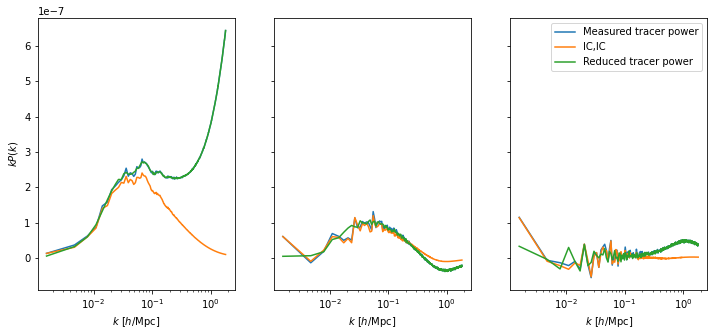

In [71]:
# Set up the canvas
if want_rsd:
    figsize = (12, 5)
    n_ell = 3
else:
    figsize = (6, 5)
    n_ell = 1
f, ax = plt.subplots(1, n_ell, sharex=True, sharey=True, figsize=figsize)
if not want_rsd:
    ax = [ax]
    
# Loop over all multipoles
for ell in range(n_ell):
    
    if want_rsd:
        pk_zz_ell = pk_zz[ell, :].flatten()
        pk_zenbu_ell = pk_zenbu[ell, :].flatten()
        pk_tt_poles_ell = pk_tt_poles[0, ell, :]
        pk_nn_betasmooth_ell = pk_nn_betasmooth[ell, :]
    else:
        pk_zz_ell = pk_zz.flatten()
        pk_zenbu_ell = pk_zenbu.flatten()
        pk_tt_poles_ell = pk_tt_poles.flatten()
        pk_nn_betasmooth_ell = pk_nn_betasmooth.flatten()
        
    ax[ell].plot(k_binc, k_binc * pk_tt_poles_ell, label='Measured tracer power')
    ax[ell].plot(k_binc, k_binc * pk_zz_ell, label='IC,IC')
    ax[ell].plot(k_binc, k_binc * pk_nn_betasmooth_ell, label='Reduced tracer power')
    #ax[ell].plot(k_binc, k_binc * pk_zenbu_ell, label='ZeNBu fitted power')
    
    if ell == 0:
        ax[ell].set_ylabel(r"$k P(k)$")
    ax[ell].set_xlabel(r"$k \ [h/{\rm Mpc}]$")
plt.xscale('log')
plt.legend()


In [16]:
zcv_dict['rho_tr_ZD']

array([[0.99943046, 0.97486897, 0.97313284, ..., 0.0463843 , 0.04588944,
        0.04537755],
       [0.99955306, 0.98515638, 0.9776689 , ..., 0.0447994 , 0.04431818,
        0.04375052],
       [0.99947541, 0.97626862, 0.97607613, ..., 0.03580631, 0.03542882,
        0.03493479]])

In [29]:
pk_zz

array([[ 6.61208758e+04,  5.15882601e+04,  6.06604036e+04, ...,
         4.46385875e+01,  4.44658210e+01,  4.43048746e+01],
       [ 3.07680626e+05, -1.52977423e+04,  2.27121587e+04, ...,
        -2.47642369e+01, -2.47428981e+01, -2.47492924e+01],
       [ 5.77895053e+05, -1.50933957e+04, -2.17783298e+04, ...,
         1.13026320e+01,  1.13049198e+01,  1.14098143e+01]])

In [37]:
mock_dict.keys()

dict_keys(['LRG'])

In [41]:
mock_dict['LRG'].keys()

dict_keys(['Ncent', 'x', 'y', 'z', 'vx', 'vy', 'vz', 'mass', 'id'])

In [42]:
9*3e6

27000000.0

In [45]:
mock_dict['LRG']['x'].itemsize*27000000.0

216000000.0

In [46]:
216000000.0/1.e9

0.216

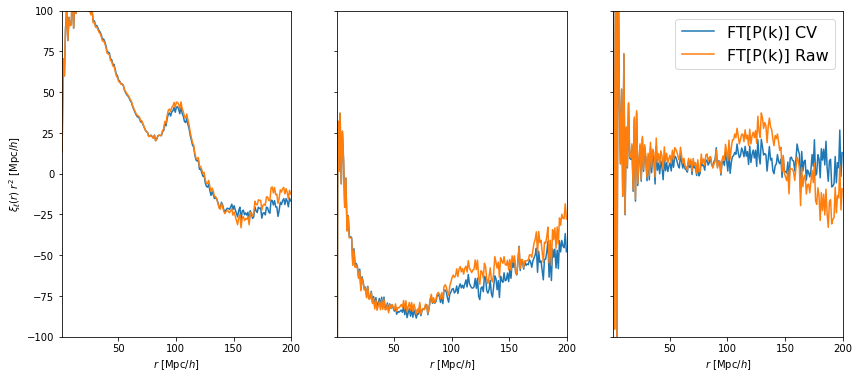

In [62]:
nmesh = 1152
want_bin = False
cs = ['k', 'c', 'm', 'y']

r_binc = zcv_dict_xi['r_binc']
xi = zcv_dict_xi['Xi_tr_tr_ell_zcv'].reshape(3, len(r_binc))#*nmesh**3
xi_raw = zcv_dict_xi['Xi_tr_tr_ell'].reshape(3, len(r_binc))#*nmesh**3

def weight(r, rp=50., Delta_r=5.):
    w = (1.-np.tanh((r-rp)/Delta_r))*0.5
    return w

r_bins = np.linspace(0, 200, 101)

# plot crap
n_ell = 3
figsize = (14, 6)
f, ax = plt.subplots(1, n_ell, sharex=True, sharey=True, figsize=figsize)
for ell in range(n_ell):
    w_ell = weight(r_binc)
    xi_ell_comb = (1.-w_ell)*xi[ell] + w_ell*xi[ell]
    xi_raw_ell_comb = (1.-w_ell)*xi_raw[ell] + w_ell*xi_raw[ell]

    if want_bin:
        r_bins_c, xi_ell_comb = bin_mat(r_binc, xi_ell_comb, r_bins)
        r_bins_c, xi_raw_ell_comb = bin_mat(r_binc, xi_raw_ell_comb, r_bins)
    else:
        r_bins_c = r_binc

    #ax[ell].plot(r_bins_c, xi_raw_ell_comb*r_bins_c**2, color=cs[0], label=r'${\rm Raw + Corrfunc} (r < 50)$')
    #ax[ell].plot(r_bins_c, xi_ell_comb*r_bins_c**2, color=cs[1], label=r'${\rm CV + Corrfunc} (r < 50)$')#'IFFT[P(k)] CV + Corrfunc (r < 50)')
    #ax[ell].plot(r_bins_c, xi_corrfunc[ell]*r_bins_c**2, color=cs[2], label=r'${\rm Raw \ Corrfunc}$')

    ax[ell].plot(r_binc, xi[ell]*r_binc**2, label='FT[P(k)] CV')
    ax[ell].plot(r_binc, xi_raw[ell]*r_binc**2, label='FT[P(k)] Raw')
    #ax[ell].plot(r_binc_corrfunc, xi_corrfunc[ell]*r_binc_corrfunc**2, label='Corrfunc')
    ax[ell].set_xlabel(r"$r \ [{\rm Mpc}/h]$")
    if ell == 0:
        ax[ell].set_ylabel(r"$\xi_\ell(r) \  r^2 \ [{\rm Mpc}/h]$")
plt.legend(fontsize=16)
plt.ylim([-100, 100])
plt.xlim([1, 200])
plt.savefig("corr.png", bbox_inches='tight', pad_inches=0.03)
plt.show()



In [65]:
zcv_dict_xi.keys()

dict_keys(['k_binc', 'poles', 'rho_tr_ZD', 'Pk_ZD_ZD_ell', 'Pk_tr_ZD_ell', 'Pk_tr_tr_ell', 'Nk_tr_tr_ell', 'Pk_tr_tr_ell_zcv', 'Pk_ZD_ZD_ell_ZeNBu', 'bias', 'Xi_tr_tr_ell_zcv', 'Xi_tr_tr_ell', 'Np_tr_tr_ell', 'r_binc'])

In [67]:
zcv_dict_xi['Pk_tr_tr_ell_zcv'][0, :10]

array([3.5873456e-06, 6.8672712e-06, 7.6555270e-06, 8.5605261e-06,
       9.4089100e-06, 9.5427295e-06, 9.2929868e-06, 8.8304550e-06,
       8.3213672e-06, 7.4294217e-06], dtype=float32)

In [69]:
zcv_dict_xi['Pk_tr_tr_ell'][0, 0, :10]

array([8.4222393e-06, 7.8174571e-06, 7.9447937e-06, 7.8886687e-06,
       1.0430798e-05, 9.1597094e-06, 9.4689331e-06, 8.6397868e-06,
       8.0171831e-06, 7.4086192e-06], dtype=float32)

In [70]:
# Parse the output from the ZCV-reduced power spectrum measurements
k_binc = zcv_dict_xi['k_binc']
pk_nn_betasmooth = zcv_dict_xi['Pk_tr_tr_ell_zcv']
pk_tt_poles = zcv_dict_xi['Pk_tr_tr_ell']
pk_zz = zcv_dict_xi['Pk_ZD_ZD_ell']
pk_zn = zcv_dict_xi['Pk_tr_ZD_ell']
r_zt = zcv_dict_xi['rho_tr_ZD']
pk_zenbu = zcv_dict_xi['Pk_ZD_ZD_ell_ZeNBu']